D:\anaconda\envs\tf_gpu\lib\site-packages\tensorflow\python\client\session.py:1766: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


[0.98783163 0.98204337 0.96751901 0.87857599]


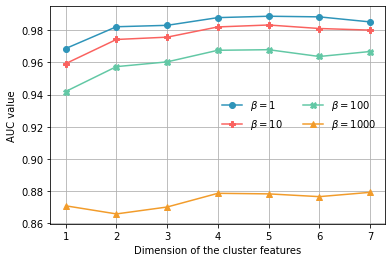

In [1]:
import  tensorflow.compat.v1 as tf
tf.disable_eager_execution()
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
import os
os.environ["OMP_NUM_THREADS"] = '4'
import scipy.io as scio
import numpy as np
import random
import sklearn.svm as svm
from sklearn.decomposition import PCA
from tensorflow import keras
from sklearn.svm import SVC
from tools import *
from sklearn.manifold import TSNE
from Data_import import data_frame
from model_evaluation import *
from ClusterNN import cluster_NN,svm_classifier
encoded_dims = [4,4,4,4,4,4,4]
cluster_dims = [1,2,3,4,5,6,7]
all_colors = ['#2E94B9', "#fa625f", '#62C8A5', '#f29c2b']
AUCs = np.zeros((len(cluster_dims),4))
for count,dim_iter in enumerate(range(len(encoded_dims))):
    metric_values_iterations_dims = scio.loadmat(f'./results_save/metric_values_iterations_encodedDim{encoded_dims[dim_iter]}_clusterDim{cluster_dims[dim_iter]}_1000.mat')
    metric_values = metric_values_iterations_dims['metric_values']
    ACC_TRAIN = metric_values['ACC_TRAIN'][0,0]
    PTA = metric_values['PTA'][0,0]
    ACC_TEST = metric_values['ACC_TEST'][0,0]
    AUC = metric_values['AUC'][0,0]
    selected_index = 1000
    AUCs[count,::] = AUC[selected_index,::]

plt.plot(cluster_dims, AUCs[::,0],'o-', color = all_colors[0], label = r'$\beta=1$')
plt.plot(cluster_dims, AUCs[::,1],'P-', color = all_colors[1], label = r'$\beta=10$')
plt.plot(cluster_dims, AUCs[::,2],'X-', color = all_colors[2], label = r'$\beta=100$')
plt.plot(cluster_dims, AUCs[::,3],'^-', color = all_colors[3], label = r'$\beta=1000$')
plt.grid()
plt.xticks(cluster_dims,cluster_dims )
plt.legend(frameon=False, ncol=2)
plt.xlabel('Dimension of the cluster features')
plt.ylabel('AUC value')
plt.savefig(f'../figures/auc_with_cluster_num.png',dpi=600)
plt.savefig(f'../figures/auc_with_cluster_num.pdf')
print(AUCs[3,::])